# CNN MODEL TO EXTRACT EMOTIONS FROM IMAGES

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers,models
from tensorflow.keras.optimizers import RMSprop

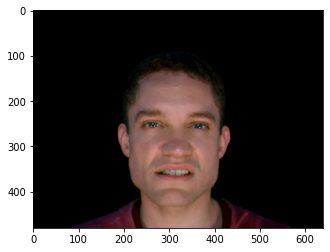

In [2]:
img=image.load_img('/content/drive/MyDrive/Emot/training/Angry/s008-04_img.tif')
plt.imshow(img)

In [3]:
cv2.imread('/content/drive/MyDrive/Emot/training/Angry/s008-04_img.tif')

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [4]:
cv2.imread('/content/drive/MyDrive/Emot/training/Angry/s008-04_img.tif').shape

(480, 640, 3)

In [5]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/Emot/training',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='categorical')
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/Emot/validation',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='categorical')

Found 357 images belonging to 7 classes.
Found 357 images belonging to 7 classes.


In [7]:
train_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Joy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [8]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [9]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(7,activation='softmax')
                                  ])

In [10]:
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])


In [11]:
model_fit=model.fit(train_dataset,epochs=10,
                    validation_data=validation_dataset)

Epoch 1/10
119/119 [==============================] - 66s 535ms/step - loss: 3.0374 - accuracy: 0.1078 - val_loss: 1.9437 - val_accuracy: 0.1597
Epoch 2/10
119/119 [==============================] - 56s 475ms/step - loss: 1.9715 - accuracy: 0.1614 - val_loss: 1.9384 - val_accuracy: 0.3669
Epoch 3/10
119/119 [==============================] - 56s 475ms/step - loss: 1.9439 - accuracy: 0.2337 - val_loss: 1.8426 - val_accuracy: 0.3754
Epoch 4/10
119/119 [==============================] - 55s 464ms/step - loss: 1.8297 - accuracy: 0.2982 - val_loss: 1.5082 - val_accuracy: 0.4398
Epoch 5/10
119/119 [==============================] - 56s 468ms/step - loss: 1.5163 - accuracy: 0.4657 - val_loss: 1.1636 - val_accuracy: 0.5994
Epoch 6/10
119/119 [==============================] - 56s 472ms/step - loss: 1.0618 - accuracy: 0.6031 - val_loss: 0.7370 - val_accuracy: 0.7003
Epoch 7/10
119/119 [==============================] - 57s 477ms/step - loss: 0.7566 - accuracy: 0.7440 - val_loss: 0.3862 - val_ac

# Predicting the emotion of new images
### these images have not been used in training
total prediction made:21  
  correct: 14 Incorrect:7

In [12]:
def predicting_images(pics):
  plt.imshow(pics)
  v=image.img_to_array(pics)
  v=np.expand_dims(v,axis=0)
  ima=np.vstack([v])
  value=model.predict(ima)
  h=np.argmax(value)
  if(h==0):
    print("ANGRY")
  elif(h==1):
    print("DISGUST")
  elif(h==2):
    print("FEAR") 
  elif(h==3):
    print("JOY")
  elif(h==4):
    print("NEUTRAL")
  elif(h==5):
    print("SAD")
  elif(h==6):
    print("SURPRISED")       


NEUTRAL


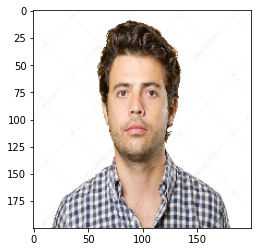

In [95]:
pic=image.load_img('/content/testpic1.jpg',target_size=(200,200))
predicting_images(pic)

SURPRISED


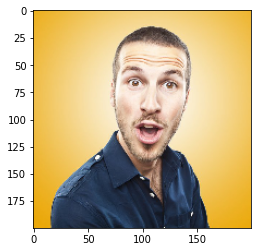

In [94]:
pic1=image.load_img('/content/testpic2.jpg',target_size=(200,200))
predicting_images(pic1)


SAD


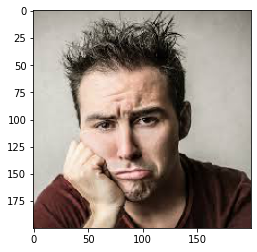

In [96]:
pic2=image.load_img('/content/testpic3.jpg',target_size=(200,200))
predicting_images(pic2)

FEAR


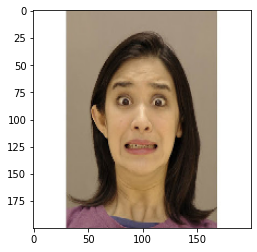

In [97]:
pic3=image.load_img('/content/testpic4.jpg',target_size=(200,200))
predicting_images(pic3)

SURPRISED


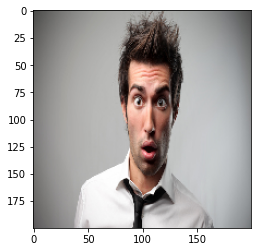

In [98]:
pic4=image.load_img('/content/testpic5.jpg',target_size=(200,200))
predicting_images(pic4)

JOY


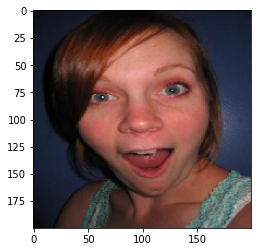

In [99]:
pic5=image.load_img('/content/testpic6.jpg',target_size=(200,200))
predicting_images(pic5)

SURPRISED


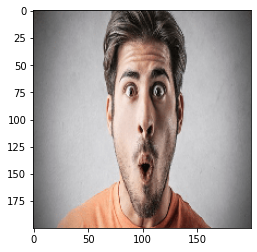

In [101]:
pic6=image.load_img('/content/testpic7.png',target_size=(200,200))
predicting_images(pic6)

SAD


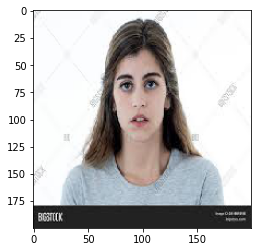

In [102]:
pic7=image.load_img('/content/testpic8.jpg',target_size=(200,200))
predicting_images(pic7)

ANGRY


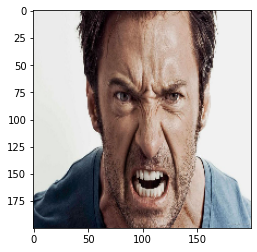

In [104]:
pic8=image.load_img('/content/testpic9.jpg',target_size=(200,200))
predicting_images(pic8)

SAD


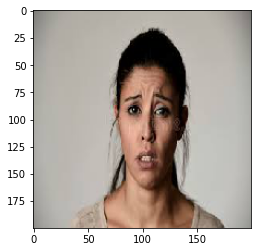

In [105]:
pic9=image.load_img('/content/testpic10.jpg',target_size=(200,200))
predicting_images(pic9)

NEUTRAL


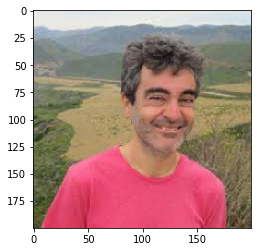

In [106]:
pic10=image.load_img('/content/testpic11.jpg',target_size=(200,200))
predicting_images(pic10)

JOY


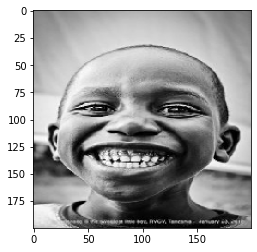

In [107]:
pic11=image.load_img('/content/testpic12.jpg',target_size=(200,200))
predicting_images(pic11)

NEUTRAL


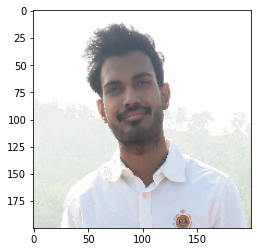

In [108]:
pic12=image.load_img('/content/testpic13.jpg',target_size=(200,200))
predicting_images(pic12)

DISGUST


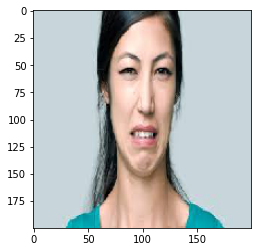

In [109]:
pic13=image.load_img('/content/testpic14.jpg',target_size=(200,200))
predicting_images(pic13)

ANGRY


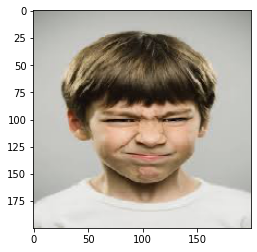

In [110]:
pic14=image.load_img('/content/testpic15.jfif',target_size=(200,200))
predicting_images(pic14)

SAD


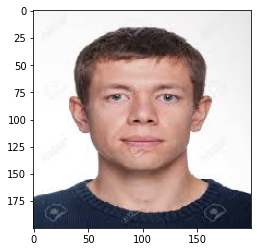

In [111]:
pic15=image.load_img('/content/testpic16.jfif',target_size=(200,200))
predicting_images(pic15)

NEUTRAL


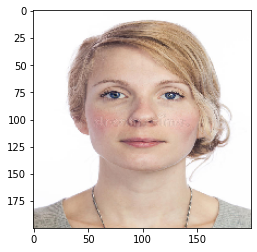

In [112]:
pic16=image.load_img('/content/testpic17.jpg',target_size=(200,200))
predicting_images(pic16)

NEUTRAL


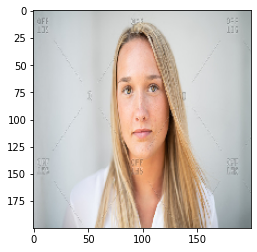

In [113]:
pic17=image.load_img('/content/testpic18.jpg',target_size=(200,200))
predicting_images(pic17)

ANGRY


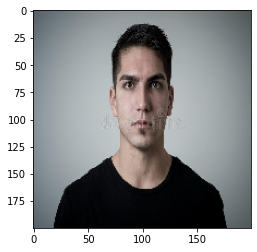

In [114]:
pic18=image.load_img('/content/testpic19.jpg',target_size=(200,200))
predicting_images(pic18)

JOY


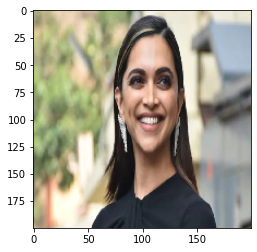

In [115]:
pic19=image.load_img('/content/testpic20.webp',target_size=(200,200))
predicting_images(pic19)

FEAR


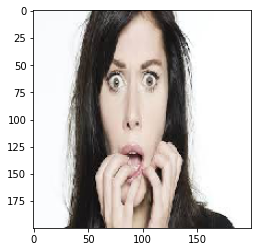

In [116]:
pic20=image.load_img('/content/testpic21.jfif',target_size=(200,200))
predicting_images(pic20)